In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [12]:

# get param set
paramsets =  pd.read_csv('../../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)
paramsets.drop('ro_B',inplace=True, axis=1)
paramsets.drop('k_sorp',inplace=True, axis=1)
#paramsets.drop('K_L',inplace=True, axis=1)
paramsets.drop('CSS_max',inplace=True, axis=1)
selectedSets = [17,38,44,85]# [36,44,51,68][19, 47, 76, 83]

In [8]:
repr(paramsets.columns.tolist())

"['beta_C', 'beta_O', 'C_thres,C', 'C_thres,O', 'DS_W', 'k_C,S', 'k_d,C', 'k_d,O', 'K_L', 'k_O,S', 'k_r,C', 'k_r,O', 'm_max,C', 'm_max,O', 'p_L', 'u_max,C', 'u_max,O', 'v_max,L', 'Y', 'Y_C', 'Y_O', 'CL_init', 'CS_init']"

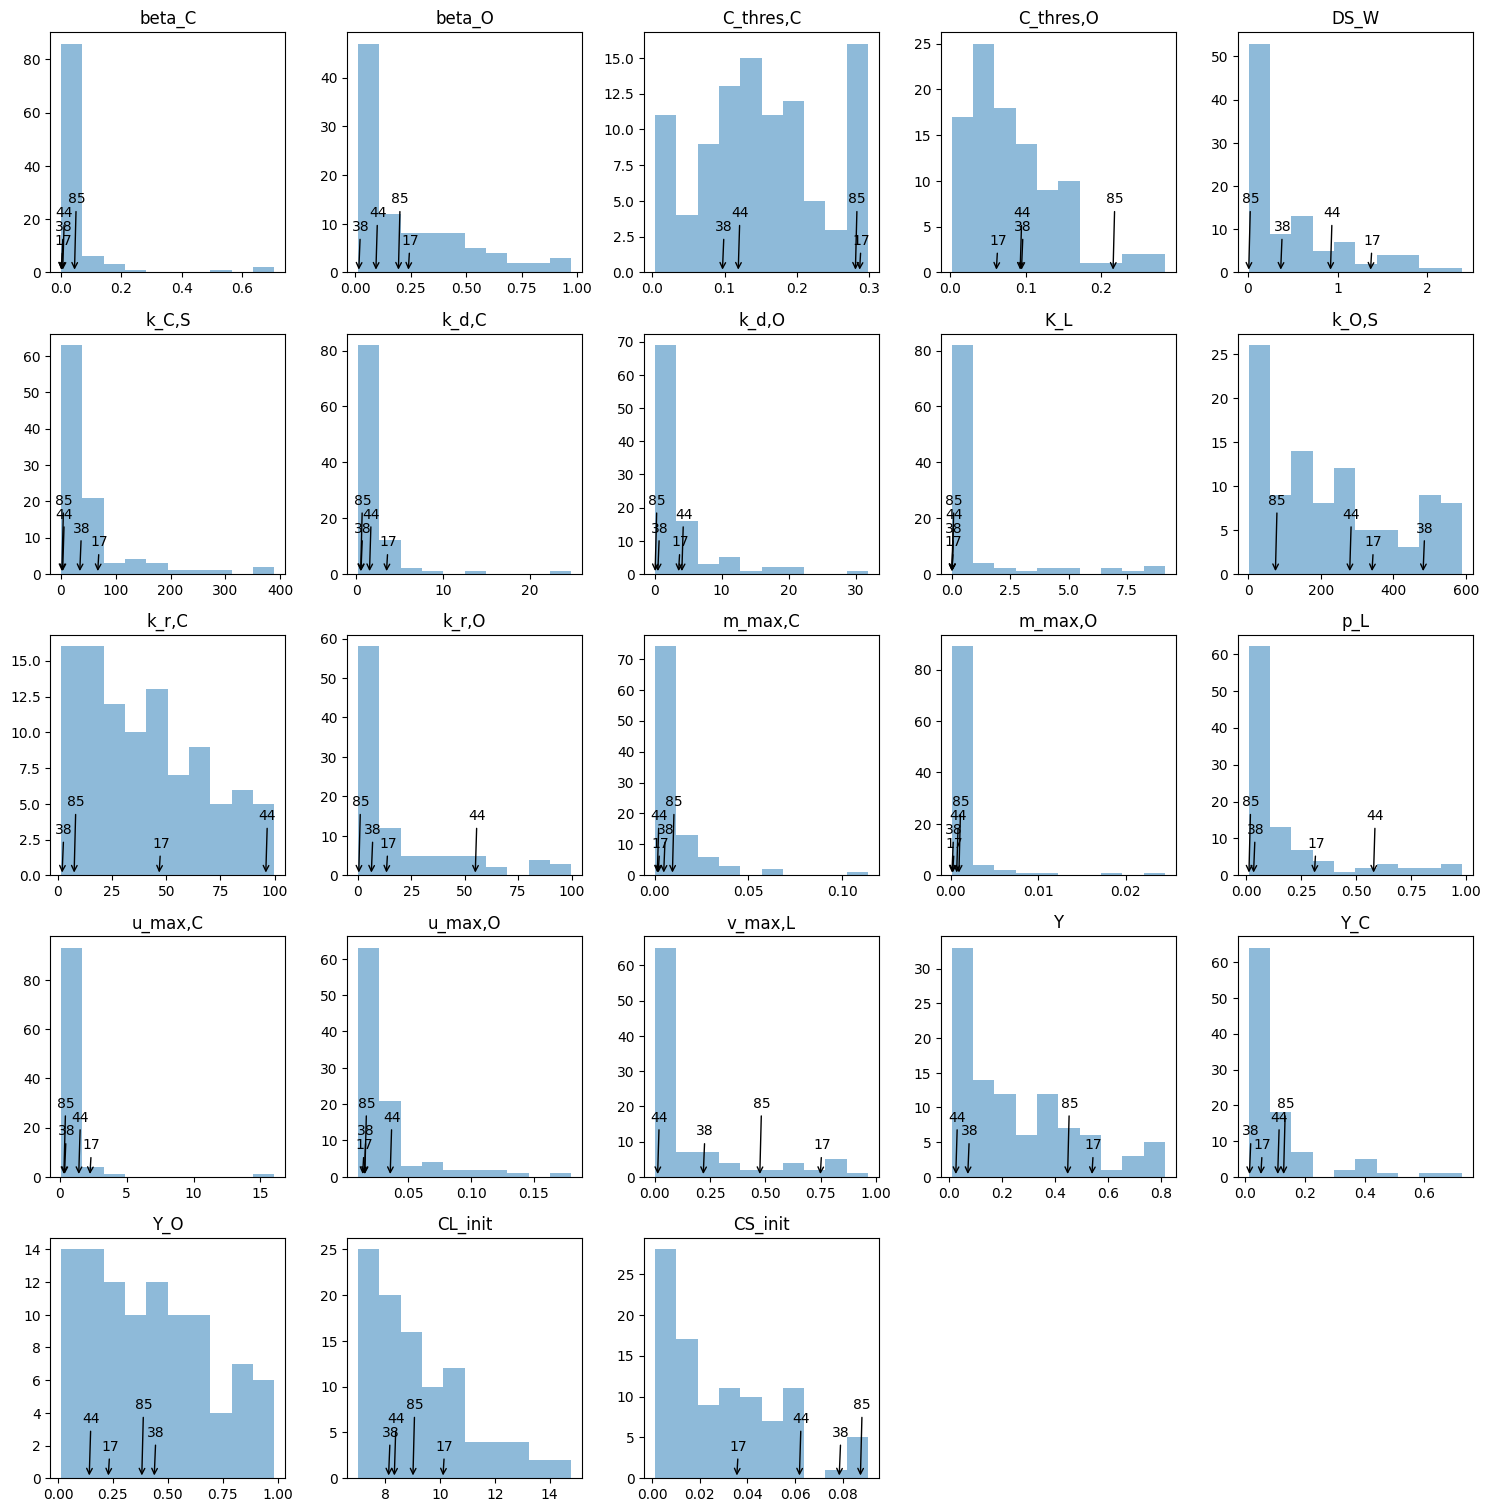

In [15]:
# Create subplots grid

# Calculate the number of rows and columns needed for subplots
num_rows = 6
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Flatten the axes array to iterate over them easily
axes = axes.flatten()

#outliers = selectedSets
# Plot histograms for each column
for i, column in enumerate(paramsets.columns):
    ax = axes[i]  # Get the current axis
    ax.hist(paramsets[column], alpha=0.5)
    ax.set_title(column)
    
    xtexts = [-10, 20, 50, 80]*2
    ytexts = [20, 30, 40, 50]*2
    # Add label for maximum value
    for idout, outliers in enumerate(selectedSets):
        # Find row index with maximum value for the current column
        max_row_index = outliers
        max_value = paramsets[column][outliers]
        ax.annotate(max_row_index,
                     xy=(max_value, 0), xycoords='data',
                     xytext=(-5, ytexts[idout]), textcoords='offset points',
                     arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

# Remove any empty subplots if the number of columns exceeds the number of data columns
for i in range(len(paramsets.columns), num_rows*num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

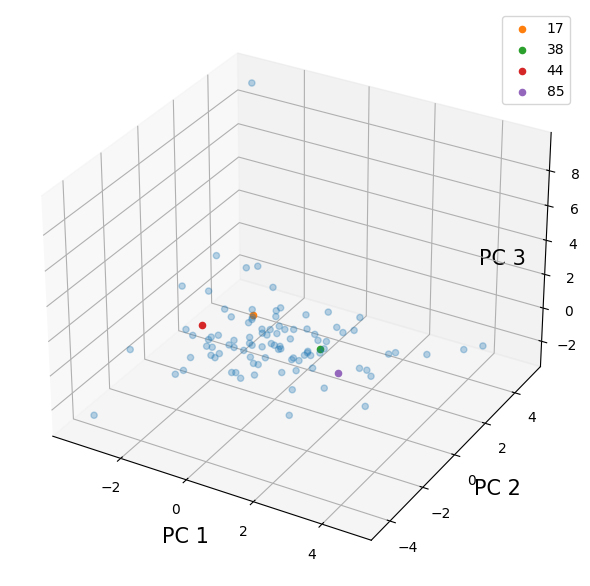

In [13]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# Separating out the features
x = paramsets

# Separating out the target
y = np.array([i for i in range(paramsets.shape[0])])
target = pd.DataFrame(data = y
             , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target[['pSet_id']]], axis = 1)


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 99)
color_labels = finalDf['pSet_id'].unique()


fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15,labelpad=-40)
#ax.set_title('2 component PCA', fontsize = 20)

# Remove rows using boolean indexing
finalDf_ = finalDf[~finalDf.index.isin(selectedSets)]
ax.scatter(finalDf_[ 'PC 1']
           , finalDf_['PC 2']
           , finalDf_['PC 3'],alpha = 0.3
           #, c = finalDf['pSet_id']#.map(color_map)
           )

#finalDf_ = finalDf

for vall in selectedSets:
    subset = finalDf[finalDf['pSet_id'] == vall]  # Select subset where 'pSet' equals the current value

    ax.scatter(subset[ 'PC 1']
           , subset['PC 2']
           , subset['PC 3'], alpha=1, 
               zorder=100,label=f'{vall}'
           #, c = finalDf['pSet_id']#.map(color_map)
           )
    plt.legend()

fig.set_tight_layout(True)
ax.grid()

In [14]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.12694961 0.11871014 0.09106764] 0.3367273882457179
